In [1]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier as sk_KNeighborsClassifier
from sklearn import datasets
from sklearn.utils import shuffle

from fromscratchtoml.neighbors import KNeighborsClassifier as fs2ml_KNeighborsClassifier
from fromscratchtoml.toolbox import binary_visualize

%matplotlib inline

In [2]:
iris = datasets.load_iris()

X = iris.data[:, :2]
Y = iris.target[:]
X, Y = shuffle(X, Y)

Xtrain = X[:120]
Ytrain = Y[:120]
Xtest = X[120:]
Ytest = Y[120:]

In [3]:
sk_knn = sk_KNeighborsClassifier()
sk_knn.fit(Xtrain, Ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [4]:
fs2ml_knn = fs2ml_KNeighborsClassifier()
fs2ml_knn.fit(Xtrain, Ytrain)

KNeighborsClassifier({'n_neighbors': 5})

In [5]:
sk_knn.predict(Xtest)

array([1, 1, 2, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2,
       1, 1, 1, 0, 0, 2, 1, 0])

In [6]:
fs2ml_knn.predict(Xtest)

array([1, 1, 2, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 2, 2, 2, 0, 1, 2, 0, 1, 2,
       1, 1, 1, 0, 0, 2, 1, 0])

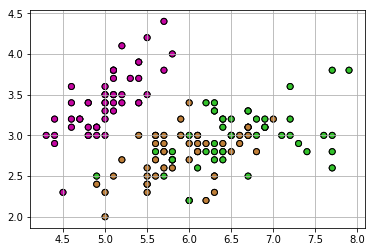

In [7]:
binary_visualize(X, Y, coarse=50)

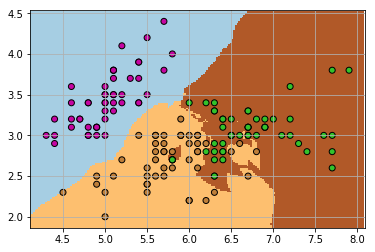

In [8]:
binary_visualize(np.array(X), clf=sk_knn, coarse=50)

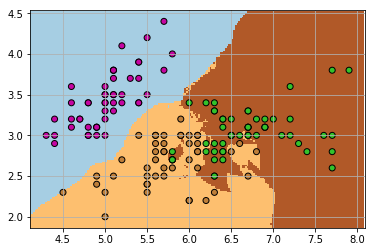

In [9]:
binary_visualize(np.array(X), clf=fs2ml_knn, coarse=50)